# Using Z-score to evaulate the outliers in SNR (Signal to Noise Ratio)

## What is an outlier
Outliers are data points that are far from other data points, they are unsually large or small as compared to other dataset. Outliers are problematic for many stastical analyzes because they can affect the mean, std, and so on

## Z-score and how it works
There are many ways to remove an outlier but we shall focus on z-score.
### How it works
A z-score reveals how far away a data point is from the mean of the data 
#### Equations for calculating z-score 
- Z = (X - $\mu)/std
    - where: 
        - X = raw measurement
        - $\mu is the mean of the dataset
        - std is the standard deviation 

# Credits

## [link](https://www.indeed.com/career-advice/career-development/outliers-statistics)

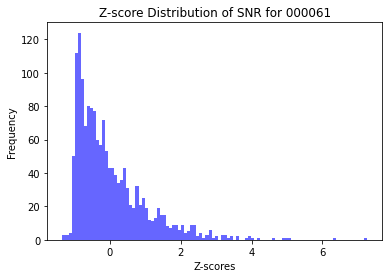

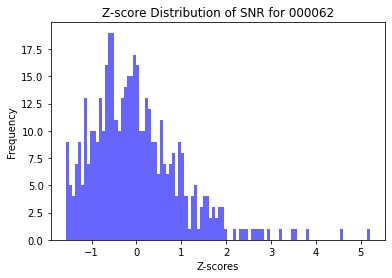

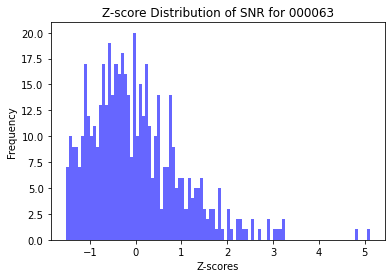

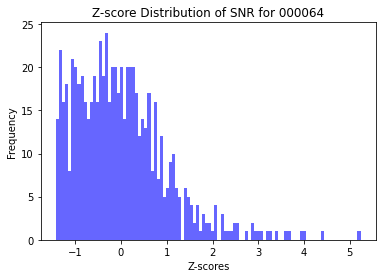

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import os

def collect_snr_values(base_path, well_labels):
    snr_values = []
    
    for well in well_labels:
        file_path = os.path.join(base_path, well, 'quality_metrics.xlsx')
        data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust the sheet name if needed
        data['snr'] = pd.to_numeric(data['snr'], errors='coerce')
        data['snr'].replace([np.inf, -np.inf], np.nan, inplace=True)
        data = data.dropna(subset=['snr'])
        snr_values.extend(data['snr'].tolist())
    
    return snr_values

def plot_z_score_distribution(snr_values, title):
    # Calculate the Z-scores for the SNR values
    z_scores = stats.zscore(snr_values)
    
    # Drop NaN values in Z-scores (if any)
    z_scores = z_scores[~np.isnan(z_scores)]
    
    # Plot the histogram for Z-scores
    if len(z_scores) > 0:
        plt.hist(z_scores, bins=100, color='blue', alpha=0.6)
        plt.title(title)
        plt.xlabel('Z-scores')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"No valid Z-scores to plot for {title}.")


# Define the base paths and well labels
base_paths = [
    '/mnt/disk15tb/mmpatil/MEA_Analysis_dev/AnalyzedData/KCNT1_T3/KCNT1_T3/240204/M07037/Network/000061',
    '/mnt/disk15tb/mmpatil/MEA_Analysis_dev/AnalyzedData/KCNT1_T3/KCNT1_T3/240204/M07037/Network/000062',
    '/mnt/disk15tb/mmpatil/MEA_Analysis_dev/AnalyzedData/KCNT1_T3/KCNT1_T3/240204/M07037/Network/000063',
    '/mnt/disk15tb/mmpatil/MEA_Analysis_dev/AnalyzedData/KCNT1_T3/KCNT1_T3/240204/M07037/Network/000064'# Add other base paths as needed
]

well_labels = [
    'well000', 'well001', 'well002', 'well003', 'well004', 'well005'
]

# Loop through each base path, collect SNR values, and plot
for base_path in base_paths:
    snr_values = collect_snr_values(base_path, well_labels)
    title = f'Z-score Distribution of SNR for {os.path.basename(base_path)}'
    plot_z_score_distribution(snr_values, title)



## Conclusion from the above graphs 
The further the z-score is from 0, the more unusual the data point is. From above graphs we can see that the data points that have z-score of 3,4,5 are unusual and can be considered as outliers. 

### Important
I remember Mandar saying positive z-score extreme values like 3,4,5 are good we don't want any extreme negative z-score values

# Calculate the interquartile range 
The interquartile range (IQR) measures the dispersion of the data points between the first and third quartile marks. Generally, a data point is an outlier if it is over 1.5 times the IQR below the first quartile or 1.5 times the IQR above the third quartile. Knowing the percentile of the first and third quartile is necessary to calculate the IQR. The median of the upper half of the data set is the percentile for the third quartile, and the median of the lower half of the data set is the percentile for the first quartile.

- **IQR = Q3 -Q1**
- Q3 = the third quartile = the median of the upper half of the data set
- Q1 = the first quartile = the median of the lower half of the data set
- **High outlier ≥ Q3 + (1.5 x IQR)**
- **Low outlier ≤ Q1 − (1.5 x IQR)**

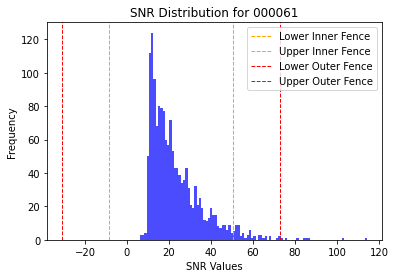

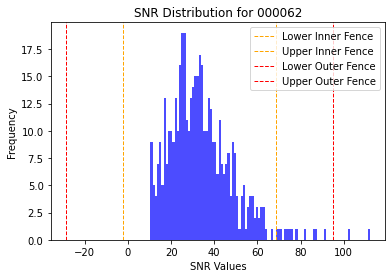

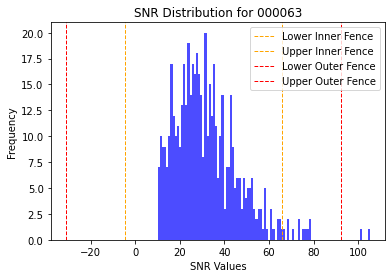

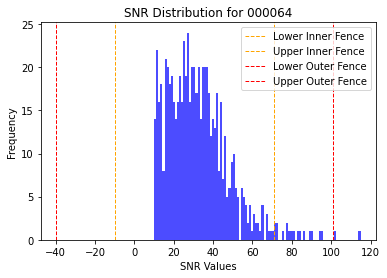

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def collect_snr_values(base_path, well_labels):
    snr_values = []
    
    for well in well_labels:
        file_path = os.path.join(base_path, well, 'quality_metrics.xlsx')
        data = pd.read_excel(file_path, sheet_name='Sheet1')  # Adjust the sheet name if needed
        data['snr'] = pd.to_numeric(data['snr'], errors='coerce')
        data['snr'].replace([np.inf, -np.inf], np.nan, inplace=True)
        data = data.dropna(subset=['snr'])
        snr_values.extend(data['snr'].tolist())
    
    return snr_values

def plot_snr_distribution_with_fences(snr_values, title):
    # Calculate fences
    Q1 = np.percentile(snr_values, 25)
    Q3 = np.percentile(snr_values, 75)
    IQR = Q3 - Q1
    lower_inner_fence = Q1 - 1.5 * IQR
    upper_inner_fence = Q3 + 1.5 * IQR
    lower_outer_fence = Q1 - 3 * IQR
    upper_outer_fence = Q3 + 3 * IQR

    # Plot the histogram for SNR values
    plt.hist(snr_values, bins=100, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('SNR Values')
    plt.ylabel('Frequency')

    # Add fences to the plot
    plt.axvline(lower_inner_fence, color='orange', linestyle='dashed', linewidth=1, label='Lower Inner Fence')
    plt.axvline(upper_inner_fence, color='orange', linestyle='dashed', linewidth=1, label='Upper Inner Fence')
    plt.axvline(lower_outer_fence, color='red', linestyle='dashed', linewidth=1, label='Lower Outer Fence')
    plt.axvline(upper_outer_fence, color='red', linestyle='dashed', linewidth=1, label='Upper Outer Fence')

    plt.legend()
    plt.show()

# Define the base paths and well labels
base_paths = [
    '/mnt/disk15tb/mmpatil/MEA_Analysis_dev/AnalyzedData/KCNT1_T3/KCNT1_T3/240204/M07037/Network/000061',
    '/mnt/disk15tb/mmpatil/MEA_Analysis_dev/AnalyzedData/KCNT1_T3/KCNT1_T3/240204/M07037/Network/000062',
    '/mnt/disk15tb/mmpatil/MEA_Analysis_dev/AnalyzedData/KCNT1_T3/KCNT1_T3/240204/M07037/Network/000063',
    '/mnt/disk15tb/mmpatil/MEA_Analysis_dev/AnalyzedData/KCNT1_T3/KCNT1_T3/240204/M07037/Network/000064',
    # Add other base paths as needed
]

well_labels = [
    'well000', 'well001', 'well002', 'well003', 'well004', 'well005'
]

# Loop through each base path, collect SNR values, and plot
for base_path in base_paths:
    snr_values = collect_snr_values(base_path, well_labels)
    title = f'SNR Distribution for {os.path.basename(base_path)}'
    plot_snr_distribution_with_fences(snr_values, title)


## Conclusion from the above graphs 
We can see that for certain data points cross the upper/lower <b>inner</b> fence so these can or cannot be considered as outliers. But data points crossing the upper/lower <b>outer</b> fence can be considered as outliers. But again I want to mention that Mandar told for snr the higher values are good especially on the positive side. So I don't see any values crossing the lower fences.